⚠️ If the generated code snippets do not work, please open an issue https://issues.hubocean.earth/form/f57a63fa-20d2-4268-af79-41eca8f374cd 🙏

In [ ]:
!pip install -U odp-sdk --quiet && pip list | grep odp
!pip install -U pydeck --quiet && pip list | grep pydeck

## 1.1 Setup ODP Client

In [ ]:
from odp.client import OdpClient # The SDK
import pandas as pd
import pydeck as pdk
from helper_functions import convert_geometry_field, wkt_to_edges

### 1.1.2 Geometric Plot Helper

In [ ]:
# loading a simple function to make a nice map display of points
def simple_pydeck_plot(geojson_lists, size=1, lat=0, lon=0, zoom=2):
    colors = [(3, 255, 209), (255, 216, 11), (157, 89, 244), (254, 119, 76)]  # Cyan, Yellow, Purple, Orange
    layers = []
    for i, geojson_list in enumerate(geojson_lists):
        layer = pdk.Layer("GeoJsonLayer", data=convert_geometry_field(geojson_list), lineWidthMinPixels=size, pointRadiusMinPixels=size, pickable=True, get_line_color=colors[i % len(colors)], get_fill_color=colors[i % len(colors)],)
        layers.append(layer)
    r = pdk.Deck(layers=layers, initial_view_state=(pdk.ViewState(latitude=lat, longitude=lon, zoom=zoom)), map_provider="mapbox", map_style='mapbox://styles/oceandatafoundation/clwg6xklg00an01pcgmeufjxq', api_keys={'mapbox': 'pk.eyJ1Ijoib2NlYW5kYXRhZm91bmRhdGlvbiIsImEiOiJjazk5bGxpNWkwYWU1M2Vya3hkcHh4czdrIn0.yf7kIiPfDNE7KP9_9wTN6A'})
    return r

In [ ]:
client = OdpClient()

## 2.1 Fetch Metadata from Catalog
- Option 1) via API calls to the catalog
- Option 2) getting UUID or qualified name from the landing page:
https://app.hubocean.earth/catalog/dataset/wpi-data
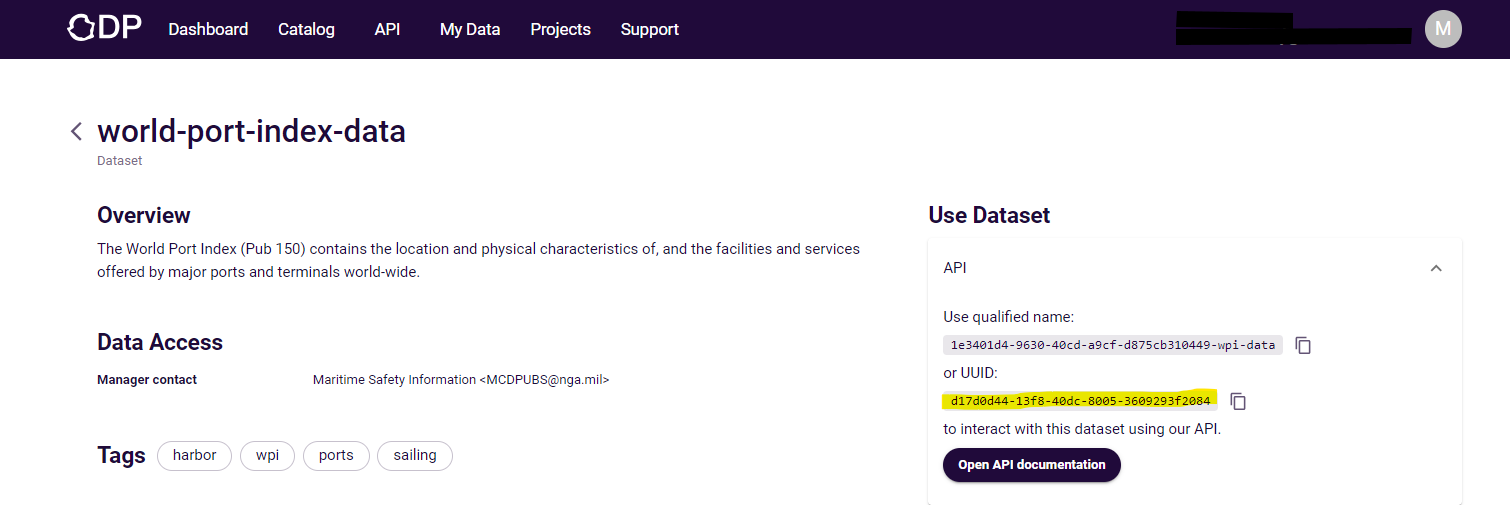

In [ ]:
## Request the dataset from the catalog using the UUID:
WPI = client.catalog.get("a1195213-790e-4171-b70d-44ed42f827f0")
## Verify the name of the dataset requested
WPI.metadata.display_name

## 2.2 Fetching data

### 2.2.1 Fetching specific columns

In [ ]:
## Request data from the dataset
WPI_dataset = client.table_v2(WPI)
pages = WPI_dataset.select(cols=['Main Port Name', 'geometry']).pages()
WPI_plot_data = [row for page in pages for row in page]

### 4.1.1 Option 1): work with list of datapoints

In [ ]:
WPI_plot_data[1]

## 3.1 Visualize data

### 3.2 Plot datapoints from query on a map

In [ ]:
simple_pydeck_plot([WPI_plot_data], lat=55, lon=7, zoom=1)

{
  "initialViewState": {
    "latitude": 55,
    "longitude": 7,
    "zoom": 1
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "Main Port Name": "Maurer",
          "geometry": {
            "coordinates": [
              -74.25,
              40.533333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Iharana",
          "geometry": {
            "coordinates": [
              50.0,
              -13.35
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Andoany",
          "geometry": {
            "coordinates": [
              48.3,
              -13.4
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Chake Chake",
          "geometry": {
            "coordinates": [
              39.766667,
              -5.25
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Mjimwema Terminal",
          "geometry": {
            "coordinates": [
              39.366667,
              -6.816667
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Delta Terminal",
          "geometry": {
            "coordinates": [
              36.166667,
              36.85
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Cinta Oil Terminal",
          "geometry": {
            "coordinates": [
              106.233333,
              -5.5
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Europa Point",
          "geometry": {
            "coordinates": [
              -5.35,
              36.133333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "New Harbor",
          "geometry": {
            "coordinates": [
              -69.483333,
              43.866667
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Dtse / Gegua Oil Terminal",
          "geometry": {
            "coordinates": [
              -43.15,
              -22.816667
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Sharmah",
          "geometry": {
            "coordinates": [
              35.25,
              27.933333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Norsworthy",
          "geometry": {
            "coordinates": [
              -95.2,
              29.733333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Minturn",
          "geometry": {
            "coordinates": [
              -68.45,
              44.15
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Criehaven",
          "geometry": {
            "coordinates": [
              -68.883333,
              43.833333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "North Point",
          "geometry": {
            "coordinates": [
              -14.366667,
              -7.883333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Bongkot Terminal",
          "geometry": {
            "coordinates": [
              102.333333,
              8.05
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Donggala",
          "geometry": {
            "coordinates": [
              119.733333,
              -0.65
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Larimna",
          "geometry": {
            "coordinates": [
              23.283333,
            

## 4.1 Inspect data

### 4.1.2 Option 2): convert from the list to a pandas dataframe

In [ ]:
WPI_data_df = pd.concat(WPI_dataset.select().dataframes(), ignore_index=True)
WPI_data_df.head()

## 5.1 Test a geospatial query of a bounding box

### 5.1.1 Create bounding box for query

In [ ]:
from shapely.geometry import Polygon, mapping, LineString

coords = [
    [21.100000, 69.652500],  
    [23.467351, 70.086159],  
    [17.412649, 70.086159], 
    [16.780000, 69.652500],  
    [14.412649, 67.218841], 
    [20.467351, 68.218841],  
    [21.100000, 69.652500]   
]



coast_poly = Polygon(coords)
geospatial_query = coast_poly.wkt
bbox_list = wkt_to_edges(geospatial_query)


In [ ]:
geospatial_query

### 5.2.1 Query the data based on a bounding box

In [ ]:
WPI_subset = WPI_dataset.select(f"geometry within '{geospatial_query}'").pages()
WPI_data_subset = [row for page in WPI_subset for row in page]

### 5.2.2 Plot the data and bounding box

In [ ]:
# viewing the geospatial subset
simple_pydeck_plot([WPI_data_subset, bbox_list], size=3, lat=69.60, lon=18.57, zoom=5)

{
  "initialViewState": {
    "latitude": 69.6,
    "longitude": 18.57,
    "zoom": 5
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "Alternate Port Name": null,
          "Anchorage Depth (m)": 23.2,
          "Cargo Pier Depth (m)": 7.9,
          "Channel Depth (m)": 23.2,
          "Chemical Holding Tank Disposal": "Unknown",
          "Communications - Airport": "Yes",
          "Communications - Radio": "Yes",
          "Communications - Radiotelephone": "Yes",
          "Communications - Rail": "Unknown",
          "Communications - Telefax": "Unknown",
          "Communications - Telephone": "Unknown",
          "Country Code": "Norway",
          "Cranes - Fixed": "Unknown",
          "Cranes - Floating": "Unknown",
          "Cranes - Mobile": "Yes",
          "Cranes Container": "Unknown",
          "Degaussing": "Unknown",
          "Digital Nautical Chart": "a2221610, coa22h, gen22c, h2221610",
          "Dirty Ballast Disposal": "Yes",
          "Dry Dock": "Medium",
          "Entrance Restriction - Heavy Swell": "No",
          "Entrance Restriction - Ice": "No",
          "Entrance Restriction - Other": "No",
          "Entrance Restriction - Tide": "No",
          "Entrance Width (m)": 0.0,
          "Estimated Time of Arrival Message": "Yes",
          "Facilities - Anchorage": "Yes",
          "Facilities - Beach Mooring": "Yes",
          "Facilities - Breakbulk": "Unknown",
          "Facilities - Container": "Unknown",
          "Facilities - Dangerous Cargo Anchorage": "Unknown",
          "Facilities - Ice Mooring": "Unknown",
          "Facilities - LNG Terminal": "Unknown",
          "Facilities - Liquid Bulk": "Unknown",
          "Facilities - Med Mooring": "Unknown",
          "Facilities - Oil Terminal": "Unknown",
          "Facilities - Other": "Unknown",
          "Facilities - Ro-Ro": "Unknown",
          "Facilities - Solid Bulk": "Unknown",
          "Facilities - Wharves": "Yes",
          "First Port of Entry": "Yes",
          "Garbage Disposal": "Unknown",
          "Good Holding Ground": "Yes",
          "Harbor Size": "Medium",
          "Harbor Type": "Coastal (Natural)",
          "Harbor Use": "Unknown",
          "IHO S-101 Electronic Navigational Chart": null,
          "IHO S-130 Sea Area": null,
          "IHO S-57 Electronic Navigational Chart": null,
          "Latitude": 68.8,
          "Lifts - 0-24 Tons": "Unknown",
          "Lifts - 100+ Tons": "Unknown",
          "Lifts - 25-49 Tons": "Yes",
          "Lifts - 50-100 Tons": "Unknown",
          "Liquified Natural Gas Terminal Depth (m)": 0.0,
          "Longitude": 16.55,
          "Main Port Name": "Harstad",
          "Maximum Vessel Beam (m)": 0.0,
          "Maximum Vessel Draft (m)": 0.0,
          "Maximum Vessel Length (m)": 0.0,
          "Medical Facilities": "Yes",
          "NAVAREA": "XIX",
          "OID": 2090.0,
          "Offshore Maximum Vessel Beam (m)": 0.0,
          "Offshore Maximum Vessel Draft (m)": 0.0,
          "Offshore Maximum Vessel Length (m)": 0.0,
          "Oil Terminal Depth (m)": 6.4,
          "Overhead Limits": "No",
          "Pilotage - Advisable": "Yes",
          "Pilotage - Available": "Yes",
          "Pilotage - Compulsory": "Yes",
          "Pilotage - Local Assistance": "Unknown",
          "Port Security": "Unknown",
          "Publication Link": "https://msi.geo.nga.mil/api/publications/download?key=16694491/SFH00000/Pub182bk.pdf&type=view",
          "Quarantine - Other": "Unknown",
          "Quarantine - Pratique": "Unknown",
          "Quarantine - Sanitation": "Yes",
          "Railway": "Unknown",
          "Region Name": "Norway -- 20620",
          "Repairs": "Major",
          "Sailing Direction or Publication": "Sailing Directions Pub. 182 (Enroute) - North and West Coasts of Norway",
          "Search and Rescue": "Unknown",
          "Services - Electrical Repair": "Yes",
          "Services - Electricity": "Yes",